In [1]:
from numpy import *
from matplotlib.pyplot import *
from math import factorial
from random import *

In [2]:
def micro_states(N_a,N_b,E_T):
    Micro_B= []
    for i in range (1,E_T):
        m1 = (factorial(N_a + i -1)/(factorial(N_a)*factorial(i-1)))
        m2 = (factorial(N_b + E_T - i -1)/(factorial(N_b)*factorial(E_T-i-1)))
        Micro_B.append(m1*m2)
    return Micro_B

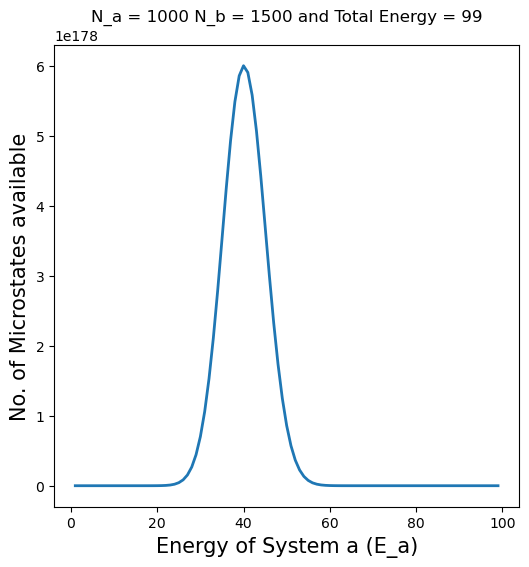

In [3]:
N_a = 1000
N_b = 1500
E_T = 100
energy = arange(1,E_T,1)
figure(figsize=(6,6))
plot(energy,micro_states(N_a,N_b,E_T),linewidth=2)
#scatter(energy,micro_states(N_a,N_b,E_T))
title(f'N_a = {N_a} N_b = {N_b} and Total Energy = {E_T-1}')
xlabel('Energy of System a (E_a)',fontsize=15)
ylabel('No. of Microstates available',fontsize=15)
show()

In [4]:
N = 100
N_a = ones(3*N)
N_b = zeros(1*N)
r = len(N_a)+len(N_b)
N_p = arange(0,r,1)
for i in range (len(N_a)):
    f = randint(0,15)
    N_a[i] = f
    

In [5]:
E_a = []
E_b = []
P_n = []
ET_b=[]
k = 0
t0_a = N_a.copy()
t0_b = N_b.copy()
while k<3000:
    a = randint(0,len(N_a)-1)
    b = randint(0,len(N_b)-1)
    E_a.append(sum(N_a)/len(N_a))
    E_b.append(sum(N_b)/len(N_b))
    ET_b.append(sum(N_b))
    P_n.append(k)
    P_a = N_a[a]
    P_b = N_b[b]
    
    if P_a > P_b:
        N_a[a]-=1
        N_b[b]+=1
    elif P_b > P_a:
        N_a[a]+=1
        N_b[b]-=1  
    if k == 100:
        t100_a = N_a.copy()
        t100_b = N_b.copy()
    if k == 200:
        t200_a = N_a.copy()
        t200_b=N_b.copy()
    if k == 600:
        t600_a = N_a.copy()
        t600_b = N_b.copy()
    if k == 1000:
        t1000_a = N_a.copy()
        t1000_b = N_b.copy()
    k+=1

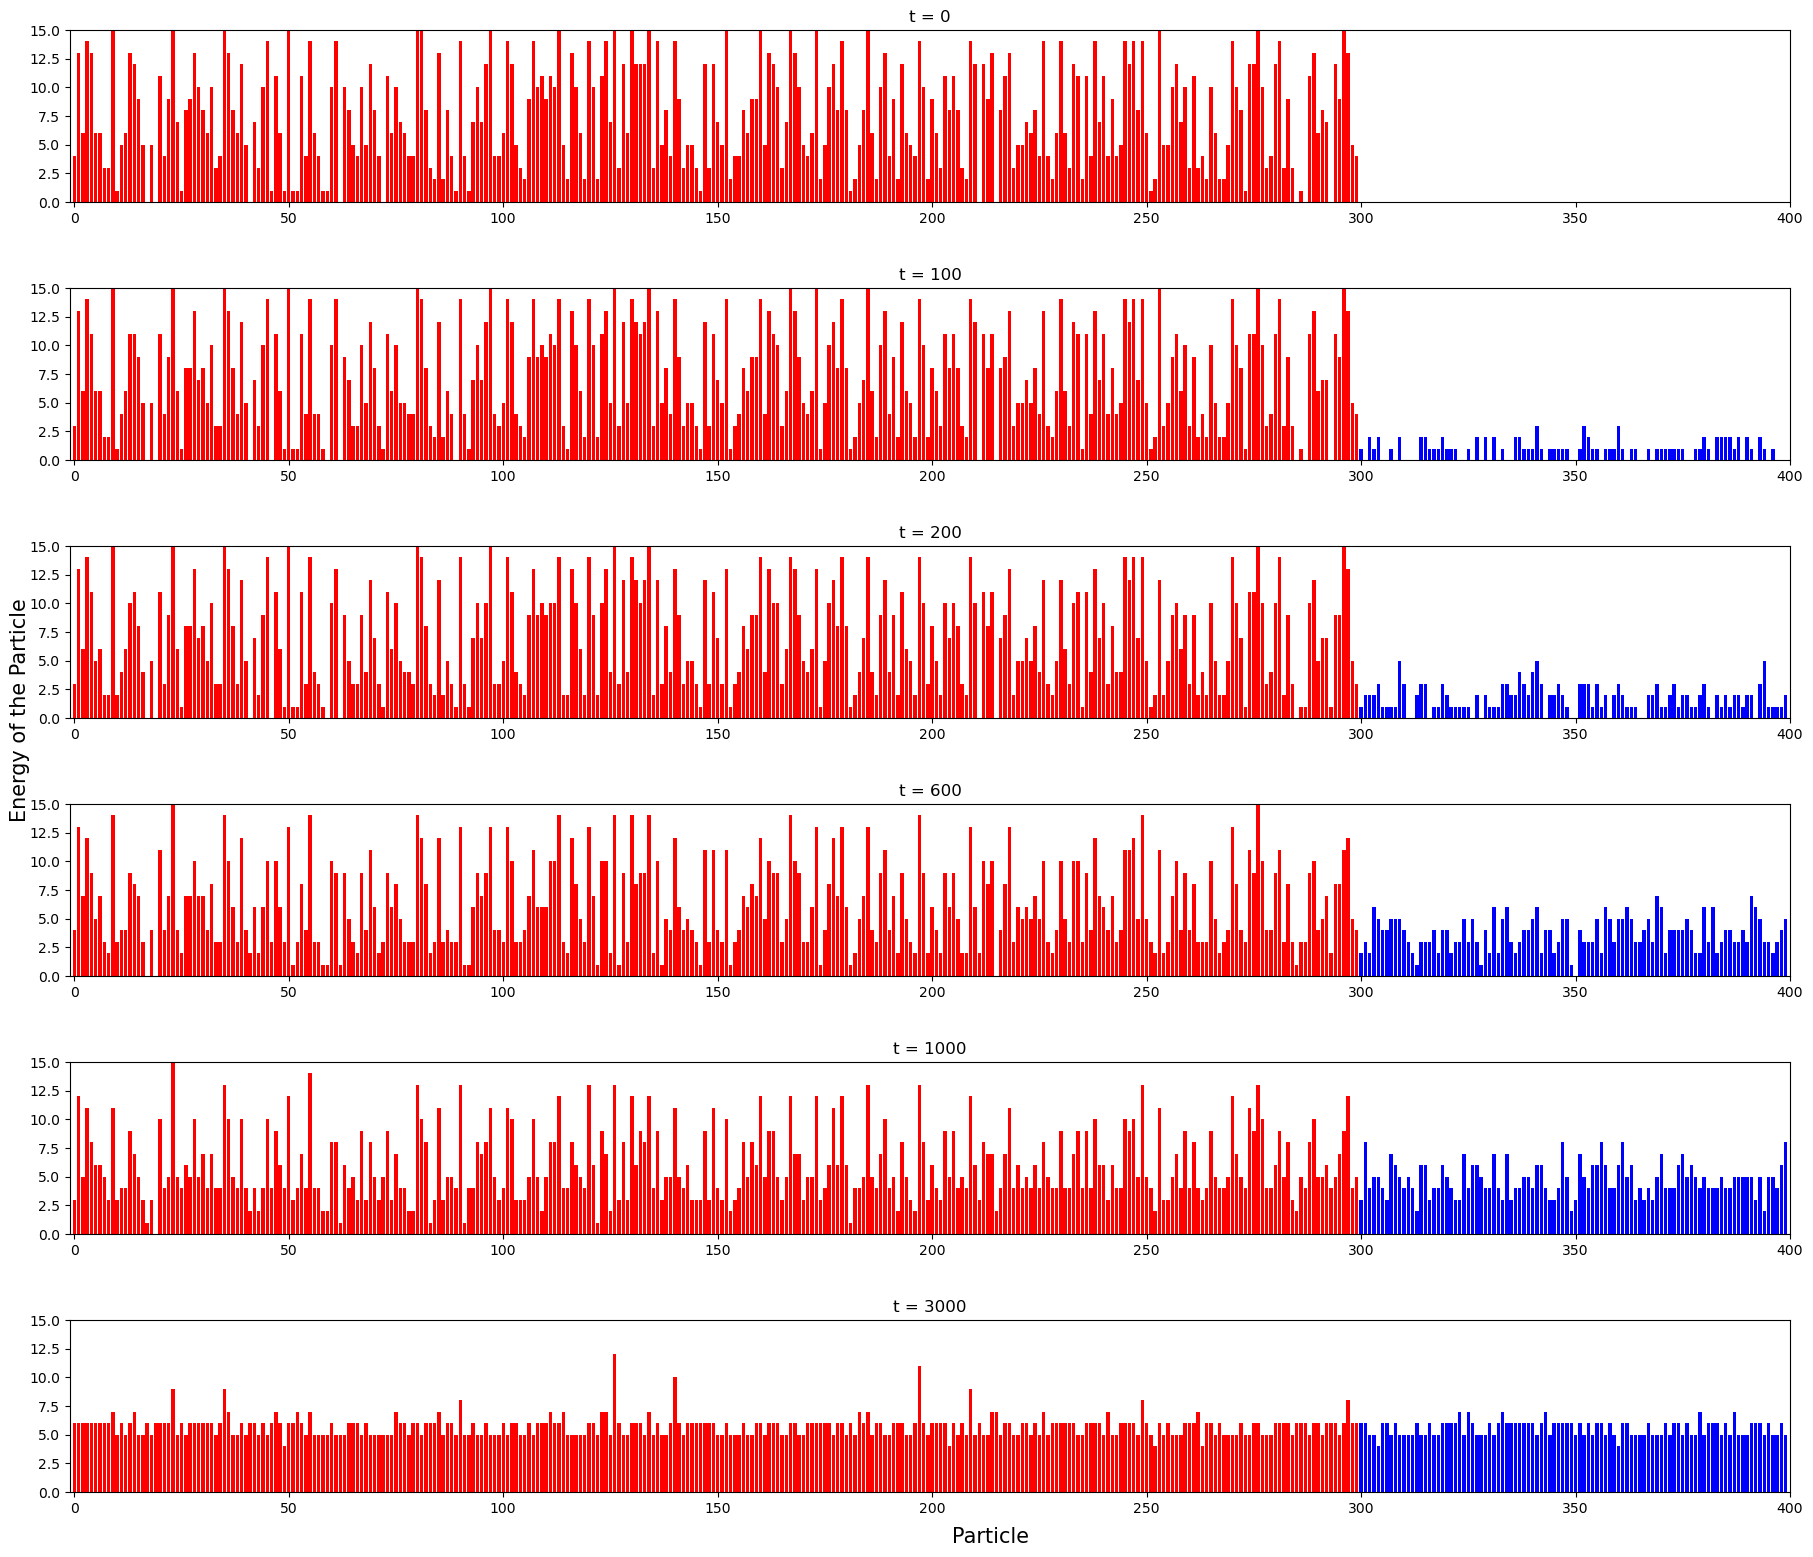

In [6]:
colors = ['red'] * len(N_a) + ['blue'] * len(N_b)
fig, axs = subplots(6, 1, figsize=(20, 17))
for ax in axs:
    ax.set_xlim(-1, r)
for ax in axs:
    ax.set_ylim(0, 15)
fig.text(0.01, 0.5, 'Energy of the Particle', va='center', rotation='vertical', fontsize=15)
fig.text(0.5, 0.01, 'Particle', ha='center', fontsize=15)
subplots_adjust(hspace=0.4, top=0.9, right=0.9, bottom=0.04, left=0.04)
M = concatenate([t0_a,t0_b])
axs[0].bar(N_p,M,color=colors)
axs[0].set_title('t = 0')
M = concatenate([t100_a,t100_b])
axs[1].bar(N_p,M,color=colors)
axs[1].set_title('t = 100')
M = concatenate([t200_a,t200_b])
axs[2].bar(N_p,M,color=colors)
axs[2].set_title('t = 200')
M = concatenate([t600_a,t600_b])
axs[3].bar(N_p,M,color=colors)
axs[3].set_title('t = 600')
M = concatenate([t1000_a,t1000_b])
axs[4].bar(N_p,M,color=colors)
axs[4].set_title('t = 1000')
M = concatenate([N_a,N_b])
axs[5].bar(N_p,M,color=colors)
axs[5].set_title('t = 3000')
subplots_adjust(hspace=0.5)
tight_layout
show()

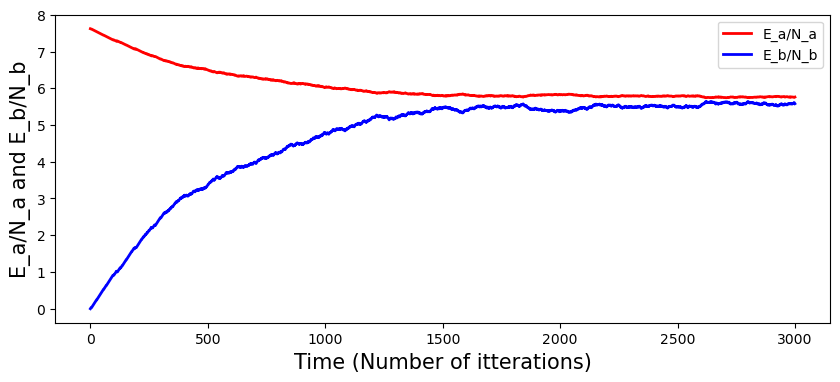

In [7]:
figure(figsize=(10,4))
plot(P_n,E_a,color='red',label='E_a/N_a',linewidth=2)
plot(P_n,E_b,color='blue',label='E_b/N_b',linewidth=2)
ylabel('E_a/N_a and E_b/N_b',fontsize=15)
xlabel('Time (Number of itterations)',fontsize=15)
legend()
show()

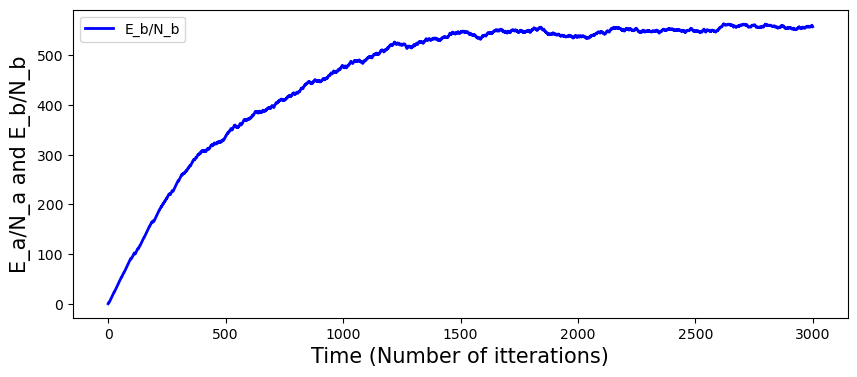

In [8]:
figure(figsize=(10,4))
plot(P_n,ET_b,color='blue',label='E_b/N_b',linewidth=2)
ylabel('E_a/N_a and E_b/N_b',fontsize=15)
xlabel('Time (Number of itterations)',fontsize=15)
legend()
show()